<a href="https://colab.research.google.com/github/javablack95/Datalit/blob/master/Hypothesis_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis
### Investigate the following hypothesis:

1.   Every season , 1st 3 weeks , the 1st and the second games scores usually goes over 1.5 goals
2.   Every season, in the 37th week 7-8 of 10 games played go over 1.5 goals
3.   For every 2 teams , when they meet, if in their previous week game both teams played away and both lost, the current week match will go over2.5 goals
4.   For every two teams , if the previous result for one team was a draw or win and the other team strictly won, the stronger team will win the game (according to the current league table) and the game will go over 1.5 goals
5.  If both teams in the previous week drew, one of them will win; investigate which one wins
6.  A strong team prefferably in the top 5 , if the current formof the last 3 games has lost all or drew all , the current week must win
7.  For the bottom 5 side teams if the form of the last 3 games was W-W-W or D-D-D , the curent week will draw 



In [0]:
import os
import re
# import red
import glob
import shutil
import numpy as np
import pandas as pd
from google.colab import drive

In [3]:
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive_path = 'drive/My Drive'


In [0]:
betin_results_folder= os.path.join(drive_path, 'betin_league_20190514')

In [0]:
betin_results_path = os.path.join(betin_results_folder, 'all_leagues_results_20190514.xlsx')

In [0]:
results_betin = pd.read_excel(betin_results_path ,index_col=0)

In [8]:
results_betin.head(10)

,result1,result2,match_result,gg,over05,over15,over25,over35,over45,homeover05,homeover15,homeover25,homeover35,awayover05,awayover15,awayover25,awayover35,resultover15,resultover25,resultunder15,resultunder25,teams,team1,team2,league,week
league_21346_week_1_EVE-NWC,2,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,X,X,EVE-NWC,EVE,NWC,21346,1
league_21346_week_1_WOL-SOU,1,4,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,X,X,WOL-SOU,WOL,SOU,21346,1
league_21346_week_1_LEI-BOU,2,2,2,1,1,1,1,1,0,1,1,0,0,1,1,0,0,2,2,X,X,LEI-BOU,LEI,BOU,21346,1
league_21346_week_1_WAT-CRY,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,WAT-CRY,WAT,CRY,21346,1
league_21346_week_1_WHU-BUR,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,X,X,1,1,WHU-BUR,WHU,BUR,21346,1
league_21346_week_1_CAR-TOT,2,3,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,X,X,CAR-TOT,CAR,TOT,21346,1
league_21346_week_1_BRI-FUL,2,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,X,X,0,BRI-FUL,BRI,FUL,21346,1
league_21346_week_1_HUD-CHE,1,2,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,X,X,HUD-CHE,HUD,CHE,21346,1
league_21346_week_1_MNU-MNC,1,2,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,X,X,MNU-MNC,MNU,MNC,21346,1
league_21346_week_1_ARS-LIV,2,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,X,X,0,ARS-LIV,ARS,LIV,21346,1


In [9]:
results_betin.columns

Index(['result1', 'result2', 'match_result', 'gg', 'over05', 'over15',
       'over25', 'over35', 'over45', 'homeover05', 'homeover15', 'homeover25',
       'homeover35', 'awayover05', 'awayover15', 'awayover25', 'awayover35',
       'resultover15', 'resultover25', 'resultunder15', 'resultunder25',
       'teams', 'team1', 'team2', 'league', 'week'],
      dtype='object')

## Hypothesis 1 


*    Every season , 1st 3 weeks , the 1st and the second games scores usually goes over 1.5 goals




In [0]:
#subset df to first 3 weeks results
results_betin3weeks = results_betin[results_betin.week <= 3]

In [0]:
results_betin3weeksov15 = results_betin3weeks[results_betin3weeks.over15 == 1]

In [12]:
league_df_temp.loc[league_df_temp.teams.str.contains(team)

SyntaxError: ignored

In [14]:
results_betin3weeksov15.head()

,result1,result2,match_result,gg,over05,over15,over25,over35,over45,homeover05,homeover15,homeover25,homeover35,awayover05,awayover15,awayover25,awayover35,resultover15,resultover25,resultunder15,resultunder25,teams,team1,team2,league,week
league_21346_week_1_EVE-NWC,2,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,X,X,EVE-NWC,EVE,NWC,21346,1
league_21346_week_1_WOL-SOU,1,4,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,X,X,WOL-SOU,WOL,SOU,21346,1
league_21346_week_1_LEI-BOU,2,2,2,1,1,1,1,1,0,1,1,0,0,1,1,0,0,2,2,X,X,LEI-BOU,LEI,BOU,21346,1
league_21346_week_1_WAT-CRY,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,WAT-CRY,WAT,CRY,21346,1
league_21346_week_1_CAR-TOT,2,3,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,X,X,CAR-TOT,CAR,TOT,21346,1


### Hypothesis 2 


*  Every season, in the 37th week 7-8 out of 10 games played go over 1.5 goals



In [0]:
# Subset every 37th week result
results_betin37 = results_betin[results_betin['week']==37]

In [0]:
#Subset every 37th week result where goals were over 1.5 
results_betin37=results_betin37[results_betin37.over15 ==1]

In [10]:
sum(results_betin37.league == 21346)

9

In [11]:
results_betin37.league.head()

league_21346_week_37_SOU-BUR    21346
league_21346_week_37_CRY-WHU    21346
league_21346_week_37_LIV-BRI    21346
league_21346_week_37_BOU-HUD    21346
league_21346_week_37_CHE-WAT    21346
Name: league, dtype: int64

In [12]:
 results_betin37.league.unique()

array([21346, 21347, 21348, 21349, 21350, 21351, 21352, 21353, 21354,
       21355, 21356, 21357, 21358, 21359, 21360, 21361, 21362, 21363,
       21364, 21365, 21366, 21367, 21368, 21369, 21370, 21371, 21372,
       21373, 21374, 21375, 21376, 21377, 21378, 21379, 21380, 21381,
       21382, 21383, 21384, 21385, 21386, 21387, 21388, 21389, 21390,
       21391, 21392, 21393, 21394, 21395, 21396, 21397, 21398, 21405,
       21412, 21413, 21414, 21415, 21416, 21417, 21418, 21419, 21420,
       21421, 21422, 21423, 21424, 21425, 21426, 21427, 21428, 21429,
       21430, 21431, 21432, 21433, 21434, 21435, 21437, 21438, 21439,
       21440, 21441, 21442, 21443, 21444, 21445, 21446, 21447, 21448,
       21449, 21450, 21451, 21452, 21453, 21454, 21455, 21456])

In [15]:
sum_of_games =[]
leagues = []

for i in results_betin37.league.unique():
  if i ==i:
    import numpy as np
    sum_of_games_per_league = sum(results_betin37.league == i)
    print(f'\n for league number {i} there were {sum_of_games_per_league} games that went over 1.5\n')
    leagues.append(i)
    sum_of_games.append(sum_of_games_per_league)
    df = pd.DataFrame(sum_of_games, index = [leagues], columns = ['sum_of_games'])

    
   
  

  
    


 for league number 21346 there were 9 games that went over 1.5


 for league number 21347 there were 10 games that went over 1.5


 for league number 21348 there were 9 games that went over 1.5


 for league number 21349 there were 9 games that went over 1.5


 for league number 21350 there were 5 games that went over 1.5


 for league number 21351 there were 9 games that went over 1.5


 for league number 21352 there were 8 games that went over 1.5


 for league number 21353 there were 8 games that went over 1.5


 for league number 21354 there were 8 games that went over 1.5


 for league number 21355 there were 6 games that went over 1.5


 for league number 21356 there were 7 games that went over 1.5


 for league number 21357 there were 9 games that went over 1.5


 for league number 21358 there were 6 games that went over 1.5


 for league number 21359 there were 6 games that went over 1.5


 for league number 21360 there were 7 games that went over 1.5


 for league number 2136

In [16]:
df.shape

(98, 1)

In [17]:
df.sum_of_games.value_counts()

9     27
8     25
7     18
6     12
10     8
5      5
4      3
Name: sum_of_games, dtype: int64

In [0]:
#if 100 was placed at each market
total_investment = 27+ 25+18+ 12+ 8+ 5 + 3

In [0]:
total_investment = total_investment  * 100 * 10

In [0]:
#if odd was avg 1.23

total_money_gotten = 98 * 100* 10 * 1.23

In [0]:
profit = total_money_gotten - total_investment

In [57]:
profit

22540.0

In [0]:
import matplotlib.pyplot as plt

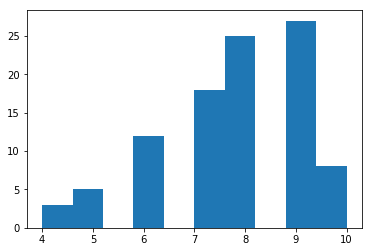

In [19]:
plt.hist(df.sum_of_games)
plt.show()

**Hypothesis 2 do not hold for all sets of leagues available in the data**

What to focus on:


*   Under what condition does the 10/10 or 9/10, 8/10 is sucessful
**




### Hypothesis 3

In [17]:
results_betin.head()

,result1,result2,match_result,gg,over05,over15,over25,over35,over45,homeover05,homeover15,homeover25,homeover35,awayover05,awayover15,awayover25,awayover35,resultover15,resultover25,resultunder15,resultunder25,teams,team1,team2,league,week
league_21346_week_1_EVE-NWC,2,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,X,X,EVE-NWC,EVE,NWC,21346,1
league_21346_week_1_WOL-SOU,1,4,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,X,X,WOL-SOU,WOL,SOU,21346,1
league_21346_week_1_LEI-BOU,2,2,2,1,1,1,1,1,0,1,1,0,0,1,1,0,0,2,2,X,X,LEI-BOU,LEI,BOU,21346,1
league_21346_week_1_WAT-CRY,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,WAT-CRY,WAT,CRY,21346,1
league_21346_week_1_WHU-BUR,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,X,X,1,1,WHU-BUR,WHU,BUR,21346,1


In [0]:
results_betinAwayov15 = results_betin[results_betin.awayover15 == 1]

In [68]:
results_betin.columns

Index(['result1', 'result2', 'match_result', 'gg', 'over05', 'over15',
       'over25', 'over35', 'over45', 'homeover05', 'homeover15', 'homeover25',
       'homeover35', 'awayover05', 'awayover15', 'awayover25', 'awayover35',
       'resultover15', 'resultover25', 'resultunder15', 'resultunder25',
       'teams', 'team1', 'team2', 'league', 'week'],
      dtype='object')

In [0]:
results_betinAwayov15 = results_betinAwayov15[['gg','result1','team1', 'team2','result2','over25','awayover15','awayover25','week','teams','league']]

In [74]:
len(results_betinAwayov15.league.unique())

98

In [70]:
results_betinAwayov15.teams.value_counts()

BOU-ARS    64
NWC-MNU    62
NWC-MNC    61
WOL-CHE    60
FUL-ARS    60
CAR-ARS    58
HUD-CHE    58
WOL-MNU    58
WAT-MNC    57
FUL-MNC    56
BOU-MNC    56
WOL-ARS    56
BOU-WAT    56
BOU-CHE    55
HUD-TOT    55
CAR-MNC    55
CAR-MNU    55
HUD-LIV    54
HUD-MNU    54
CAR-TOT    54
WOL-BUR    54
HUD-ARS    53
CAR-LIV    53
BOU-EVE    52
FUL-LEI    52
CAR-BUR    52
WOL-LIV    52
BOU-TOT    52
WOL-TOT    51
FUL-CHE    51
           ..
EVE-CAR    16
LIV-BRI    16
WHU-WOL    16
WAT-CAR    16
WHU-NWC    16
BUR-WOL    16
WHU-FUL    16
SOU-BOU    15
LIV-HUD    15
SOU-NWC    15
SOU-FUL    15
LIV-BOU    15
CHE-BRI    15
WHU-BOU    15
MNU-HUD    14
MNC-WOL    14
WHU-CAR    14
CRY-BOU    14
EVE-BOU    14
BUR-CAR    14
ARS-BOU    14
CRY-CAR    13
CHE-WOL    12
ARS-CAR    12
MNC-BOU    11
LEI-HUD    10
MNC-CAR     9
CHE-BOU     9
MNC-HUD     8
MNC-FUL     8
Name: teams, Length: 380, dtype: int64

In [48]:
results_betinAwayov15.team2.value_counts()

MNC    874
ARS    844
MNU    834
CHE    820
TOT    785
LIV    767
BUR    732
LEI    692
EVE    687
SOU    676
WAT    675
WHU    626
CRY    595
BRI    514
NWC    490
HUD    408
WOL    402
FUL    392
CAR    387
BOU    356
Name: team2, dtype: int64

In [49]:
results_betinAwayov15.team1.value_counts()

BOU    828
CAR    824
WOL    812
FUL    803
HUD    787
BRI    722
NWC    693
CRY    644
WAT    605
LEI    579
SOU    572
WHU    564
EVE    563
TOT    550
BUR    544
LIV    544
ARS    528
MNU    496
CHE    478
MNC    420
Name: team1, dtype: int64

In [50]:
results_betinAwayov15.gg.value_counts()

1    9626
0    2930
Name: gg, dtype: int64

In [51]:
results_betinAwayov15.awayover25.value_counts()

0    8043
1    4513
Name: awayover25, dtype: int64

In [0]:
results_betinAwayov25 = results_betinAwayov15[results_betinAwayov15.awayover25== 1]

In [54]:
results_betinAwayov25.team2.value_counts()

MNC    382
MNU    373
ARS    367
TOT    323
CHE    322
LIV    297
BUR    283
EVE    250
LEI    246
SOU    235
WAT    233
WHU    217
CRY    193
NWC    152
BRI    145
WOL    118
FUL    101
HUD     97
BOU     90
CAR     89
Name: team2, dtype: int64

In [55]:
results_betinAwayov25.team1.value_counts()

FUL    344
CAR    339
HUD    335
WOL    330
BOU    325
NWC    269
BRI    267
CRY    250
WHU    211
LEI    195
WAT    194
SOU    187
ARS    180
BUR    178
LIV    177
EVE    175
TOT    170
MNU    151
CHE    139
MNC     97
Name: team1, dtype: int64

In [0]:
Hypothesis

# Hypothesis

In [56]:
results_betin.head()

,result1,result2,match_result,gg,over05,over15,over25,over35,over45,homeover05,homeover15,homeover25,homeover35,awayover05,awayover15,awayover25,awayover35,resultover15,resultover25,resultunder15,resultunder25,teams,team1,team2,league,week
league_21346_week_1_EVE-NWC,2,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,X,X,EVE-NWC,EVE,NWC,21346,1
league_21346_week_1_WOL-SOU,1,4,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,X,X,WOL-SOU,WOL,SOU,21346,1
league_21346_week_1_LEI-BOU,2,2,2,1,1,1,1,1,0,1,1,0,0,1,1,0,0,2,2,X,X,LEI-BOU,LEI,BOU,21346,1
league_21346_week_1_WAT-CRY,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,WAT-CRY,WAT,CRY,21346,1
league_21346_week_1_WHU-BUR,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,X,X,1,1,WHU-BUR,WHU,BUR,21346,1


In [0]:
results_betin.value

In [0]:
results_betindraw = results_betin[results_betin.match_result == 2]

In [65]:
results_betindraw.teams.value_counts()

FUL-CAR    42
CAR-BUR    41
CAR-BOU    41
CAR-HUD    40
FUL-WAT    40
NWC-HUD    40
WOL-WHU    40
CAR-SOU    40
FUL-WOL    39
SOU-EVE    39
NWC-WAT    38
CAR-WOL    38
BOU-LIV    38
NWC-TOT    37
EVE-WAT    37
EVE-ARS    37
CHE-TOT    37
WOL-BOU    37
BUR-BRI    36
FUL-HUD    36
HUD-BOU    36
BRI-WHU    36
BOU-WOL    36
WHU-CRY    36
EVE-LIV    36
WOL-HUD    36
LIV-NWC    36
EVE-CRY    35
CAR-BRI    35
FUL-LEI    35
           ..
ARS-BOU    20
LIV-BOU    20
SOU-BOU    20
MNC-WHU    19
MNC-NWC    19
BUR-CAR    19
WAT-HUD    19
MNC-BRI    19
MNC-WAT    19
BUR-BOU    19
LIV-WOL    19
EVE-SOU    19
TOT-LIV    19
BOU-ARS    18
LIV-HUD    18
WHU-WOL    18
MNU-ARS    18
MNU-BOU    18
LEI-CAR    17
SOU-FUL    17
EVE-NWC    17
WHU-HUD    16
MNC-FUL    16
BUR-WOL    15
ARS-HUD    15
ARS-CAR    15
MNU-HUD    13
MNC-CAR    13
MNC-HUD    12
MNC-BOU    10
Name: teams, Length: 380, dtype: int64

In [79]:
results_betindraw[results_betindraw.teams == 'FUL-CAR']


  

,result1,result2,match_result,gg,over05,over15,over25,over35,over45,homeover05,homeover15,homeover25,homeover35,awayover05,awayover15,awayover25,awayover35,resultover15,resultover25,resultunder15,resultunder25,teams,team1,team2,league,week
league_21346_week_37_FUL-CAR,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X,X,2,2,FUL-CAR,FUL,CAR,21346,37
league_21347_week_3_FUL-CAR,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,FUL-CAR,FUL,CAR,21347,3
league_21351_week_28_FUL-CAR,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,FUL-CAR,FUL,CAR,21351,28
league_21352_week_6_FUL-CAR,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,FUL-CAR,FUL,CAR,21352,6
league_21354_week_10_FUL-CAR,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X,X,2,2,FUL-CAR,FUL,CAR,21354,10
league_21356_week_20_FUL-CAR,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X,X,2,2,FUL-CAR,FUL,CAR,21356,20
league_21357_week_37_FUL-CAR,2,2,2,1,1,1,1,1,0,1,1,0,0,1,1,0,0,2,2,X,X,FUL-CAR,FUL,CAR,21357,37
league_21360_week_2_FUL-CAR,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,FUL-CAR,FUL,CAR,21360,2
league_21362_week_9_FUL-CAR,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,FUL-CAR,FUL,CAR,21362,9
league_21363_week_1_FUL-CAR,1,1,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,2,X,X,2,FUL-CAR,FUL,CAR,21363,1
